In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2') 
#for interactivity 
from ipywidgets import interact 

Data = pd.read_csv("AgriculturalData.csv")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [56]:
# 2200 rows and 8 columns
Data.shape

(2200, 8)

# Exploratory Data Analysis


In [57]:
Data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [58]:
Data.isnull().sum()
# Checking if there is missing value.
## Note : If there is null values we can use mean to replace the missing values if it is numerical, 
## if it is categorical use mode, if there is huge outliers we can use median. 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [59]:
# Checking the crops present in this data set 
Data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [60]:
# We are checking the summary for all the crops 
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(Data["N"].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(Data["P"].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(Data["K"].mean()))
print("Average Temperature in celcius : {0:.2f}".format(Data["temperature"].mean()))
print("Average Relative Humidity % : {0:.2f}".format(Data["humidity"].mean()))
print("Average PH value in the Soil : {0:.2f}".format(Data["ph"].mean()))
print("Average Rainfall in mm : {0:.2f}".format(Data["rainfall"].mean()))


Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Temperature in celcius : 25.62
Average Relative Humidity % : 71.48
Average PH value in the Soil : 6.47
Average Rainfall in mm : 103.46


In [61]:
# Lets Check the Summary Statistics for each of the Crops using interact :)
@interact
def summary(crops = list(Data['label'].value_counts().index)):
    x = Data[Data['label'] == crops]
    print("________________________________________")
    print("\033[1;32mStatistics for Nitrogen\033[0m")
    print("Minimum Nitrogen Required :", x["N"].min())
    print("Average Nitrogen Required :", x["N"].mean())
    print("Max Nitrogen Required :", x["N"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for Phosphorous\033[0m")
    print("Minimum Phosphorous Required :", x["P"].min())
    print("Average Phosphorous Required :", x["P"].mean())
    print("Max Phosphorous Required :", x["P"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for Potassium\033[0m")
    print("Minimum Potassium Required :", x["K"].min())
    print("Average Potassium Required :", x["K"].mean())
    print("Max Potassium Required :", x["K"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for Temperature\033[0m")
    print("Minimum Temperature Required :", x["temperature"].min())
    print("Average Temperature Required :", x["temperature"].mean())
    print("Max Temperature Required :", x["temperature"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for Humidity\033[0m")
    print("Minimum Humidity Required :", x["humidity"].min())
    print("Average Humidity Required :", x["humidity"].mean())
    print("Max Humidity Required :", x["humidity"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for PH\033[0m")
    print("Minimum PH Required :", x["ph"].min())
    print("Average PH Required :", x["ph"].mean())
    print("Max PH Required :", x["ph"].max())
    print("________________________________________")
    print("\033[1;32mStatistics for Rainfall\033[0m")
    print("Minimum RainfallRequired :", x["rainfall"].min())
    print("Average Rainfall Required :", x["rainfall"].mean())
    print("Max Rainfall Required :", x["rainfall"].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [62]:
## Let's compare the Average requirement for each crops with average conditions.
@interact
def compare(conditions =["N","P","K","temperature","ph",'humidity',"rainfall"]):
    print("\033[1;32mAverage Value For\033[0m", conditions, "is : {0:.2f}".format(Data[conditions].mean()))
    print("________________________________________")
    print("Rice : {0:.2f}".format(Data[(Data["label"] == "rice" )][conditions].mean()))
    print("Black Grams : {0:.2f}".format(Data[(Data["label"] == "blackgram" )][conditions].mean()))
    print("Banana : {0:.2f}".format(Data[(Data["label"] == "banana" )][conditions].mean()))
    print("Jute : {0:.2f}".format(Data[(Data["label"] == "jute" )][conditions].mean()))
    print("Coconut : {0:.2f}".format(Data[(Data["label"] == "coconut" )][conditions].mean()))
    print("Apple : {0:.2f}".format(Data[(Data["label"] == "apple" )][conditions].mean()))
    print("Papaya : {0:.2f}".format(Data[(Data["label"] == "papaya" )][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(Data[(Data["label"] == "muskmelon" )][conditions].mean()))
    print("Grapes : {0:.2f}".format(Data[(Data["label"] == "grapes" )][conditions].mean()))
    print("Watermelon : {0:.2f}".format(Data[(Data["label"] == "watermelon" )][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(Data[(Data["label"] == "kidneybeans" )][conditions].mean()))
    print("Mung Beans: {0:.2f}".format(Data[(Data["label"] == "mungbean" )][conditions].mean()))
    print("Oranges : {0:.2f}".format(Data[(Data["label"] == "orange" )][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(Data[(Data["label"] == "chickpea" )][conditions].mean()))
    print("Lentils : {0:.2f}".format(Data[(Data["label"] == "lentil" )][conditions].mean()))
    print("Cotton : {0:.2f}".format(Data[(Data["label"] == "cotton" )][conditions].mean()))
    print("Maize : {0:.2f}".format(Data[(Data["label"] == "maize")][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(Data[(Data["label"] == "mothbeans" )][conditions].mean()))
    print("Pigeon Peas: {0:.2f}".format(Data[(Data["label"] == "pigeonpeas" )][conditions].mean()))
    print("Mango : {0:.2f}".format(Data[(Data["label"] == "mango" )][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(Data[(Data["label"] == "pomegranate")][conditions].mean()))
    print("Coffee : {0:.2f}".format(Data[(Data["label"] == "coffee" )][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [63]:
# We will make this function more intutive 
@interact
def compare(conditions =["N","P","K","temperature","ph",'humidity',"rainfall"]):
    print("\033[1;33mCrops which require greater than average\033[0m", conditions, '\n')
    print(Data[Data[conditions] > Data[conditions].mean()]["label"].unique())
    print("\033[1;35m________________________________________\033[0m")
    print("\033[1;33mCrops which require less than average\033[0m", conditions, '\n')
    print(Data[Data[conditions] <= Data[conditions].mean()]["label"].unique())
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

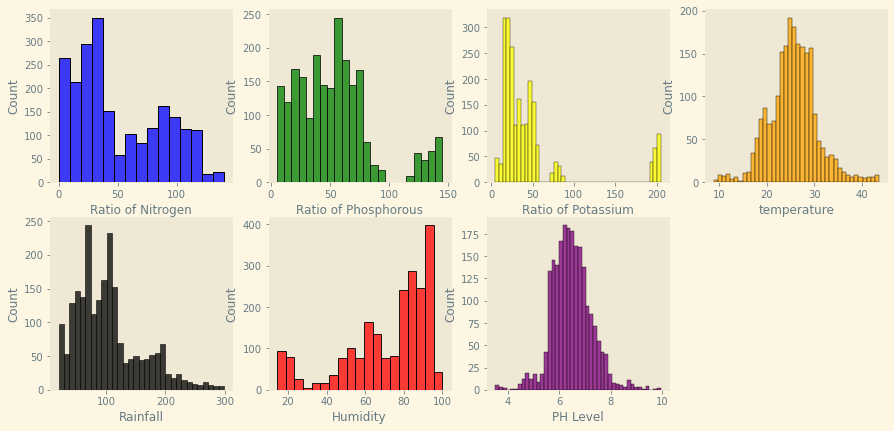

In [64]:
 ### We will check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.histplot(Data["N"], color="blue")
plt.xlabel("Ratio of Nitrogen", fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(Data["P"], color="green")
plt.xlabel("Ratio of Phosphorous", fontsize=12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(Data["K"], color="yellow")
plt.xlabel("Ratio of Potassium", fontsize=12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(Data["temperature"], color="orange")
plt.xlabel("temperature", fontsize=12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(Data["rainfall"], color="black")
plt.xlabel("Rainfall", fontsize=12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(Data["humidity"], color="red")
plt.xlabel("Humidity", fontsize=12)
plt.grid()

plt.subplot(2, 4, 7)
sns.histplot(Data["ph"], color="purple")
plt.xlabel("PH Level", fontsize=12)
plt.grid()


plt.show()

## We will find hidden patterns from this graphs. We can see that there are some crops which require very high proportions of
## phosphorous and potassium as a distribution chart for both is highly skewed. Apart from that there are some crops which require
## very high and very low temperatures for their growth

## We will find hidden patterns from these graphs. 
* We can see that there are some crops which require very high proportions of phosphorous and potassium as a distribution chart for both is highly skewed. 
* Apart from that there are some crops which require very high and very low temperatures for their growth similarly there are some crops which require very high and very low ph values in the soil.

In [65]:
## We will dig into data set to find more hidden patterns.
print("\033[1;31mSome Hidden Patterns\033[0m")
print("\033[1;37m_____________________________\033[0m")
print("\033[1;34mCrops Which Requires very High Ratio of Nitrogen Content in Soil: \033[0m", Data[Data["N"] > 120]['label'].unique())
print("\033[1;34mCrops Which Requires very High Ratio of Phosphorous Content in Soil: \033[0m", Data[Data["P"] > 100]['label'].unique())
print("\033[1;34mCrops Which Requires very High Ratio of Potassium Content in Soil: \033[0m", Data[Data["K"] > 200]['label'].unique())
print("\033[1;34mCrops Which Requires very High Rainfall: \033[0m", Data[Data["rainfall"] > 200]['label'].unique())
print("\033[1;34mCrops Which Requires very Low Temperature: \033[0m", Data[Data["temperature"] < 10]['label'].unique())
print("\033[1;34mCrops Which Requires very High Temperature: \033[0m", Data[Data["temperature"] > 40]['label'].unique())
print("\033[1;34mCrops Which Requires very Low Humidity: \033[0m", Data[Data["humidity"] < 20]['label'].unique())
print("\033[1;34mCrops Which Requires very Low PH: \033[0m", Data[Data["ph"] < 4]['label'].unique())
print("\033[1;34mCrops Which Requires very High PH: \033[0m", Data[Data["ph"] > 9 ]['label'].unique())

Some Hidden Patterns
_____________________________
Crops Which Requires very High Ratio of Nitrogen Content in Soil:  ['cotton']
Crops Which Requires very High Ratio of Phosphorous Content in Soil:  ['grapes' 'apple']
Crops Which Requires very High Ratio of Potassium Content in Soil:  ['grapes' 'apple']
Crops Which Requires very High Rainfall:  ['rice' 'papaya' 'coconut']
Crops Which Requires very Low Temperature:  ['grapes']
Crops Which Requires very High Temperature:  ['grapes' 'papaya']
Crops Which Requires very Low Humidity:  ['chickpea' 'kidneybeans']
Crops Which Requires very Low PH:  ['mothbeans']
Crops Which Requires very High PH:  ['mothbeans']


# I can see that cotton requires nitrogen in huge quantity whereas apples and grapes both require high quantity of phosphorous and potassium. Also crops such as rice, papaya and coconout require huge rainfall, then we have grapes which require very low rainfall compared to all other crops. Mothbeans can be grown in both low and high ph values.

In [66]:
### Let s check which crops can only be grown in Summer season, Winter Season and rainy season.

print("\033[1;31mSummer Crops\033[0m")
print(Data[(Data["temperature"] > 30) & (Data["humidity"] > 50)]['label'].unique())
print("\033[1;35m_____________________________\033[0m")
print("\033[1;31mWinter Crops\033[0m")
print(Data[(Data["temperature"] < 20) & (Data["humidity"] > 30)]['label'].unique())
print("\033[1;35m_____________________________\033[0m")
print("\033[1;31mRainy Crops\033[0m")
print(Data[(Data["rainfall"] > 200) & (Data["humidity"] > 30)]['label'].unique())
print("\033[1;35m_____________________________\033[0m")

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
_____________________________
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
_____________________________
Rainy Crops
['rice' 'papaya' 'coconut']
_____________________________


## We are done with EDA. It is time to find out the similar crops based on their soil and climatic conditions and for doing this we are going to use clustering analysis. Finding out the similar crops it can help the farmers in alternative farming.  Means more money

In [67]:
### We will try cluster for these crops Clustering is an unsupervised learning which means that we will not provide any labels
## for training the data instead we will simply find out the similar data points by following existing patterns within the data.
## We will use k means clustering.

from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')
## The code extracts specific columns ("N", "P", "K", "temperature", "ph", "humidity", "rainfall") from the DataFrame 
## named Data and converts them into a NumPy array, which is a data structure commonly used for numerical computations in Python
## This allows for efficient handling and analysis of the selected agricultural condition parameters.
x = Data.loc[:, ["N","P","K","temperature","ph","humidity","rainfall"]].values

print(x.shape)

# Let s convert this data into a dataframe
x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


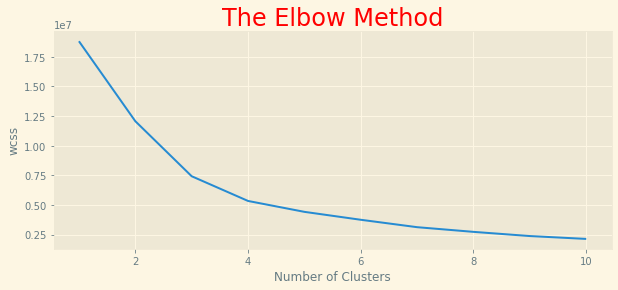

In [68]:
## We will determine the optimum number of clusters withing the Data Set

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range (1,11):
    km = KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init = 10, random_state = 0 )
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plot the results
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method", fontsize = 24, color ="red")
plt.xlabel("Number of Clusters")
plt.ylabel('wcss')
plt.show()

# We can see that there are two elbows here first one is point three and second one is at point 4.We will simply choose to go with the latest elbow means 4. We will have four clusters in our data set.

In [69]:
# We will implement the K means algorithm to perform clustering analysis.
km = KMeans(n_clusters =4, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_means = km.fit_predict(x)
#We will traing data using this algorithm and store it in a variable called y means 
#Find the results
a = Data["label"]
y_means = pd.DataFrame(y_means)
c = pd.concat([y_means, a], axis = 1)
c = c.rename(columns = {0: "cluster"})


#Checking the Clusters of each crops
print("\033[1;31mLet's check the Results after Applying the K Means Clustering Analysis\033[0m")
print("Crops in First Cluster:", c[c["cluster"] == 0]["label"].unique())
print("\033[1;35m......................................................\033[0m")
print("Crops in Second Cluster:", c[c["cluster"] == 1]["label"].unique())
print("\033[1;35m......................................................\033[0m")
print("Crops in Third Cluster:", c[c["cluster"] == 2]["label"].unique())
print("\033[1;35m......................................................\033[0m")
print("Crops in Forth Cluster:", c[c["cluster"] == 3]["label"].unique())

Let's check the Results after Applying the K Means Clustering Analysis
Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
......................................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
......................................................
Crops in Third Cluster: ['grapes' 'apple']
......................................................
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


## Crops in same clusters are similar to each other which in turn will help the farmers to choose alternate crops very easily and maximize their productivity.

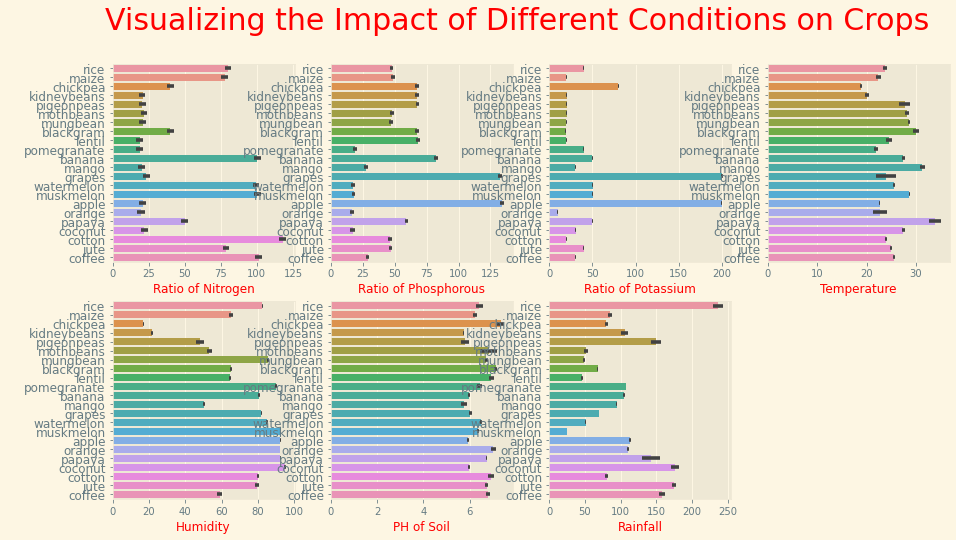

In [70]:
## Visualizing the Impact of Different Conditions on Crops

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(Data['N'],Data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 2)
sns.barplot(Data['P'],Data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 3)
sns.barplot(Data['K'], Data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 4)
sns.barplot(Data['temperature'], Data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 5)
sns.barplot(Data['humidity'], Data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 6)
sns.barplot(Data['ph'], Data['label'])
plt.ylabel(' ')
plt.xlabel('PH of Soil', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

plt.subplot(2, 4, 7)
sns.barplot(Data['rainfall'], Data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 12, color='red')
plt.yticks(fontsize = 12)

title_text = 'Visualizing the Impact of Different Conditions on Crops'
plt.suptitle(title_text, fontsize=30, color='red')
plt.show()

In [71]:
## Now we will build a predictive model that can suggest the best crops according to the soil and the climatic conditions 
## available for specific region. We will develop machine learning model that can predict the most suitable crops.
## We will evaulate model s performance. We will use Logistic Regression Model. It is a probabilistic model that works very well
## in cases of likelihood and multiple classes(labels).


# Let s split the Data set for Predictive Modelling
# We can not keep both x and y sets together for training the model as we want to predict.
# X will contain all the columns such as the ratio of N,K,P, temperature,humidity, rainfall, ph. Y will be name of labels.
y = Data["label"]
x = Data.drop(["label"], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)



Shape of x: (2200, 7)
Shape of y: (2200,)


In [72]:
#We will create training and testing sets for validation of results

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
##%80 percentage of all the data will go into the training set and rest of the 20 percent it will go the testing set.

print("The Shape of X Train", x_train.shape)
print("The Shape of X Test", x_test.shape)
print("The Shape of Y Train", y_train.shape)
print("The Shape of Y Test", y_test.shape)

The Shape of X Train (1760, 7)
The Shape of X Test (440, 7)
The Shape of Y Train (1760,)
The Shape of Y Test (440,)


In [73]:
# Creating Predictive Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



In [74]:
## Higher value of precision and recall hints towards a very good predictive model 
## Let's evaluate the model performance

from sklearn.metrics import classification_report

#Print the classification report

ab = classification_report(y_test, y_pred)
print(ab)



              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## We can say model is highly accurate. We are done with testing now we will do real time predictions.

In [75]:
## Checking the Had of the Data set to do some predictions
Data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [76]:
prediction = model.predict((np.array([[90,20,40,15,96,7,45]])))
print("\033[1;35mThe Recommended Crop for the Given Climatic Condition is : \033[0m", prediction)

The Recommended Crop for the Given Climatic Condition is :  ['watermelon']


In [77]:
prediction = model.predict((np.array([[119,40,40,20,80,7,200]])))
print("\033[1;35mThe Recommended Crop for the Given Climatic Condition is : \033[0m", prediction)

The Recommended Crop for the Given Climatic Condition is :  ['coffee']


In [78]:
prediction = model.predict((np.array([[27,60,70,19,75,7,90]])))
print("\033[1;35mThe Recommended Crop for the Given Climatic Condition is : \033[0m", prediction)

The Recommended Crop for the Given Climatic Condition is :  ['papaya']
